Final Project Data 601

The source URL for the data:

Dataset 1: https://www.kaggle.com/mikejohnsonjr/united-states-crime-rates-by-county

Dataset 2: https://www.kaggle.com/goldenoakresearch/us-household-income-stats-geo-locations

Dataset 3: https://www.kaggle.com/jayrav13/unemployment-by-county-us

This dataset is available for the general public through the website of Kaggle. Accessing this data does not violate any laws. These specific datasets have been previously analyzed in Kaggle.

Dataset 1: There are 3136 rows, 24 columns in this dataset and the file is 337 kB.

Dataset 2: There are 32526 rows, 19 columns in this dataset and the file is 5 MB.

Dataset 3: There are 885548 rows, 5 columns in this dataset and the file is 34 MB.

I choose these datasets as I did a research project during my undergrad on crime & safety. So I think I have the knowledge to develop hypotheses, understand and analyze the data in this subject area. 

At first, I have used some techniques to clean the data such as remove duplicate rows, null value if there is any, change column name for better analysis, etc. I have used head and tail function for sanity checks. 
Then I have merged my datasets for my main analysis. I have developed a hypothesis and tested the data available to see if that hypothesis is true. The hypothesis and statistical method have been discussed later in the notebook. I have shown some analysis through the visualization. 



In [1]:
import pandas as pd
import matplotlib
from functools import reduce
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import math

# Loading datasets

In [2]:
us_state_code = {
    'Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
    'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL',
    'Georgia': 'GA','Guam': 'GU','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA',
    'Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE',
    'Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY',
    'North Carolina': 'NC','North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK',
    'Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI','South Carolina': 'SC',
    'South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI',
    'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

## First Dataset

### Read the data

In [3]:
df_crime= pd.read_csv("crime/crime_data_w_population_and_crime_rate.csv", sep=',')
df_crime.shape

(3136, 24)

In [4]:
df_crime.head()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31


In [5]:
df_crime.tail()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
3131,"Ohio County, IN",0.0,3132,1,4,762,6084,0,2,1,...,0,0,0,2,2,0,0,5994,18,115
3132,"Newton County, MS",0.0,3133,1,4,1465,21545,3346,3,1,...,0,0,0,4,0,1,0,21689,28,101
3133,"Jerauld County, SD",0.0,3134,1,4,2424,2108,2108,1,1,...,0,0,0,1,3,1,0,2066,46,73
3134,"Cimarron County, OK",0.0,3135,1,4,2167,2502,2502,2,2,...,0,0,0,1,2,0,0,2335,40,25
3135,"Lawrence County, MS",0.0,3136,1,4,1453,12714,0,1,1,...,0,0,0,0,0,0,0,12514,28,77


### Data Cleaning and processing

#### Checking if any NaN value in the entire dataframe then dropping corresponding rows

In [6]:
if df_crime.isnull().values.any():
    print(df_crime.isnull().sum())
    df_crime = df_crime.dropna(how='any').copy()
df_crime.shape

(3136, 24)

#### Added a new column "crime_level" to catogorize high ,low crime level of that particular county. Then calculated high crime and low crime county based on crime_rate_per_100000 by county and removing any duplicate rows if any

In [7]:
df_crime["crime_level"] = df_crime.apply(
    lambda x: "High" if x.crime_rate_per_100000 >= df_crime["crime_rate_per_100000"].median() else "Low", axis=1) 

In [8]:
df_crime.drop_duplicates(inplace=True, subset='county_name', keep="last")
df_crime.shape

(3136, 25)

#### Selecting necessary columns

In [9]:
selected_colms = ["county_name", "crime_level","crime_rate_per_100000", "population","AG_ARRST", "ROBBERY", 
                  "BURGLRY", "MURDER"]
df_crime = df_crime[selected_colms]
df_crime.shape

(3136, 8)

In [10]:
df_crime.head()

,county_name,crime_level,crime_rate_per_100000,population,AG_ARRST,ROBBERY,BURGLRY,MURDER
0,"St. Louis city, MO",High,1791.995377,318416,15,1778,4995,119
1,"Crittenden County, AR",High,1754.914968,49746,4,165,1482,8
2,"Alexander County, IL",High,1664.700485,7629,2,5,82,1
3,"Kenedy County, TX",High,1456.310680,412,1,1,5,0
4,"De Soto Parish, LA",High,1447.402430,27083,3,17,149,3


## Second Dataset

### Read the data

In [11]:
df_income= pd.read_csv("income/kaggle_income.csv", sep=',', encoding='unicode_escape')
df_income.shape

(32526, 19)

In [12]:
df_income.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


### Data Cleaning and processing

#### Checking if any NaN value in the entire dataframe then dropping corresponding rows

In [13]:
if df_income.isnull().values.any():
    print(df_income.isnull().sum())
    df_income = df_income.dropna(how='any').copy()
df_income.shape

(32526, 19)

#### Calculate avg income by county and removing any duplicate rows if any

In [14]:
#Renamed the column "County" to "county_name" for making it a common column among the 3 datasets
df_income.rename({"County":"county_name"}, axis=1, inplace=True)

In [15]:
#Merged state code with county name to get a unique county  
df_income["county_name"] = df_income.apply(lambda x: x.county_name+", "+ us_state_code[x.State_Name], axis=1) 

In [16]:
#Added a new column and calculated average income of all the cities mean income under a county
df_income["avg_income"]= df_income['Mean'].groupby(df_income['county_name']).transform('mean')

In [17]:
#Added a new column "income_level" to catogorize high ,low income level of a particular county
df_income["income_level"] = df_income.apply(
    lambda x: "High" if x.avg_income >= df_income["avg_income"].median() else "Low", axis=1) 

In [18]:
#removed any duplicated value 
df_income.drop_duplicates(inplace=True, subset='county_name', keep="last")
df_income.shape

(1678, 21)

#### Selecting necessary columns

In [19]:
selected_colms = ["State_Name", "county_name", "avg_income", "income_level"]
df_income = df_income[selected_colms]
df_income.shape

(1678, 4)

In [20]:
df_income.head()

,State_Name,county_name,avg_income,income_level
1,Alabama,"Barbour County, AL",37725.0,Low
6,Alabama,"Escambia County, AL",33737.0,Low
8,Alabama,"Morgan County, AL",57994.0,Low
9,Alabama,"Talladega County, AL",54807.0,Low
10,Alabama,"DeKalb County, AL",47929.0,Low


## Third Dataset

### Read the data

In [21]:
df_unemployment= pd.read_csv("unemployment/output.csv", sep=',', encoding='unicode_escape')
df_unemployment.shape

(885548, 5)

### Data Cleaning and processing

#### Checking if any NaN value in the entire dataframe then dropping corresponding rows

In [22]:
if df_unemployment.isnull().values.any():
    print(df_unemployment.isnull().sum())
    df_unemployment = df_unemployment.dropna(how='any').copy()
df_unemployment.shape

(885548, 5)

In [23]:
df_unemployment.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


#### Keeping rows for year 2016 since our crime data and income data are for year 2016

In [24]:
df_unemployment = df_unemployment.loc[df_unemployment.Year==2016]
df_unemployment.shape

(34306, 5)

In [25]:
df_unemployment.head()
df_unemployment.shape

(34306, 5)

#### Calculate avg unemployment by county over the year and removing any duplicate rows if any

In [26]:
#replaced the column name of "County" to "county_name" for making it a common column among the 3 datasets
df_unemployment.rename({"County":"county_name"}, axis=1, inplace=True)

In [27]:
#Merged state code with county name within a single column to get a unique county 
df_unemployment["county_name"]= df_unemployment.apply(lambda x: x.county_name+", "+ us_state_code[x.State], axis=1) 

In [28]:
#Added a new column for average unemployment rate for the whole year
df_unemployment["avg_unemp_rate"]= df_unemployment['Rate'].groupby(df_unemployment['county_name']).transform('mean')

In [29]:
#removed any duplicate value
df_unemployment.drop_duplicates(inplace=True, subset='county_name', keep="last")

#### Selecting necessary columns

In [30]:
selected_colms = ["county_name", "avg_unemp_rate"]
df_unemployment = df_unemployment[selected_colms]
df_unemployment.shape

(2885, 2)

In [31]:
df_unemployment.head()

,county_name,avg_unemp_rate
97099,"Saint Helena Parish, LA",7.7375
97100,"Saint Landry Parish, LA",8.3250
97101,"Saint Bernard Parish, LA",6.3625
97102,"Saint Mary Parish, LA",9.3375
97103,"Orleans Parish, LA",6.0875


# Merging Datasets

In [32]:
#merged all the 3 datasets based on the column "county_name"
df = pd.merge(pd.merge(df_crime, df_income, on = ["county_name"]), df_unemployment, on = ["county_name"])
df.shape

(1515, 12)

In [33]:
df.head()


,county_name,crime_level,crime_rate_per_100000,population,AG_ARRST,ROBBERY,BURGLRY,MURDER,State_Name,avg_income,income_level,avg_unemp_rate
0,"De Soto Parish, LA",High,1447.402430,27083,3,17,149,3,Louisiana,47916.5,Low,7.650000
1,"Shelby County, TN",High,1315.003752,939465,15,3512,14011,135,Tennessee,117661.0,High,5.283333
2,"Scott County, MO",High,1163.145839,39290,7,26,236,2,Missouri,47044.0,Low,5.708333
3,"Greenwood County, SC",High,1140.226324,69723,10,73,965,7,South Carolina,35798.0,Low,5.283333
4,"Davidson County, TN",High,1129.513728,658602,10,1753,5875,65,Tennessee,62867.0,Low,3.466667


# Hypothesis test

### Define hypothesis

Question: Does the unemployment rate differ based on crime?

Reference paper: Unemployment and crime; New evidence for an old question(https://www.researchgate.net/publication/227356125_Unemployment_and_Crime_New_Evidence_for_an_Old_Question)

Null hypothesis: There is no significant difference in the unemployment rate between high crime and low crime areas.
    
Alternative hypothesis: Based on the reference paper, there has a significant effect of the unemployment rate on crime. That means, the unemployment rate is high in high crime areas and the unemployment rate is low in the low crime area.

Statistical method: I will perform an ANOVA test to test my hypothesis.

### ANOVA test

Dependent variable = avg_unemp_rate

Independent varilables = crime_level, income_level

Control on income_level (categorical variable)


In [34]:
# model 
mod = ols('avg_unemp_rate ~ crime_level + income_level + crime_level:income_level', data=df).fit()

In [35]:
aov_table = sm.stats.anova_lm(mod, typ=2)

In [36]:
print("\nANOVA table with effect sizes:")
aov_table


ANOVA table with effect sizes:


,sum_sq,df,F,PR(>F)
crime_level,225.701867,1.0,83.020927,2.505446e-19
income_level,234.602598,1.0,86.294922,5.222745e-20
crime_level:income_level,0.954305,1.0,0.351026,5.536214e-01
Residual,4107.826009,1511.0,NaN,NaN


### Bayes factor to Interpret the p-values 

In [37]:
# inferencing p-values using Bayes factor
# Reference paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6057773/
print("\n\nCalculating Bayes Factors:")
n = df.shape[0]
k = 2
df1 = k - 1 # between groups degree of freedom
df2 = n - k # within the groups degree of freedom
F = aov_table.F['crime_level']
# Weight of evidence in favor of the null hypothesis.
bf01 = math.sqrt((n**df1)*(1+(F*df1)/df2)**(-n))
# Weight of evidence in favor of the alternative hypothesis.
bf10 = bf01**(-1)
print("Weight of evidence in favor of the null hypothesis(BF01 score)", bf01)
print("Weight of evidence in favor of the alternative hypothesis(BF10 score)", bf10)



Calculating Bayes Factors:
Weight of evidence in favor of the null hypothesis(BF01 score) 1.0386491904757947e-16
Weight of evidence in favor of the alternative hypothesis(BF10 score) 9627889851258730.0


## Analysis 

The "P-value" of the ANOVA test is less than .05 for crime, income, and both crime and income together. So the null hypothesis is rejected and the alternative hypothesis is accepted.
Although P-value is significant, it is not guaranteed that this P-value is always correct. So I am inferencing the P-value using the Bayes factor. Based on this reference paper(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6057773/), I have calculated the Bayes factor to get the P-value inference. 
Based on the Bayes factor, the weight of evidence in favor of the null hypothesis is very low and alternative hypothesis is quite high. So the alternate hypothesis is proved to be strong.


# Other analysis and visualization 

## Does higher number of population create more robbery, burglry and murder in the US counties? 

In [38]:
df[['population', 'ROBBERY','BURGLRY','MURDER']].corr()

,population,ROBBERY,BURGLRY,MURDER
population,1.000000,0.909312,0.920687,0.862550
ROBBERY,0.909312,1.000000,0.916667,0.956995
BURGLRY,0.920687,0.916667,1.000000,0.888497
MURDER,0.862550,0.956995,0.888497,1.000000


<AxesSubplot:>

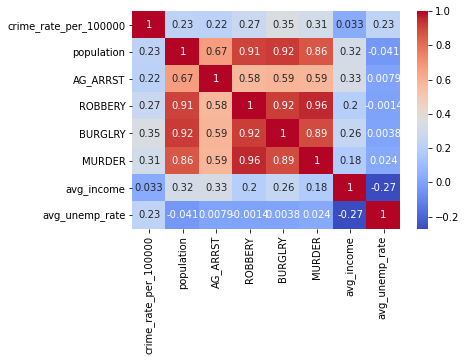

In [39]:
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

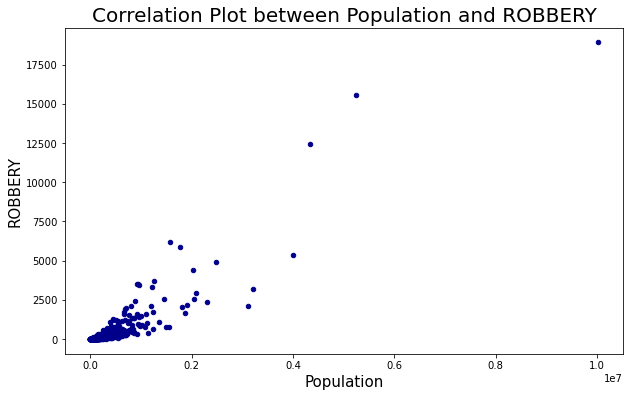

In [40]:
df.plot(kind='scatter', figsize=(10,6), color='DarkBlue', x = "population", y = "ROBBERY")
plt.title("Correlation Plot between Population and ROBBERY", fontsize=20)
plt.xlabel("Population", fontsize=15)
plt.ylabel("ROBBERY", fontsize=15)
plt.show()

There is a strong correlation between population and crime. That means a higher population affects robbery, murder, etc. 
I have also used a heat map to see the population's correlation with other factors such as average income, average unemployment rate, and crime rate per 100000.
A visualization of the correlation plot between population and robbery has been shown too.  

## What are the top 20 counties based on number of average arrests?

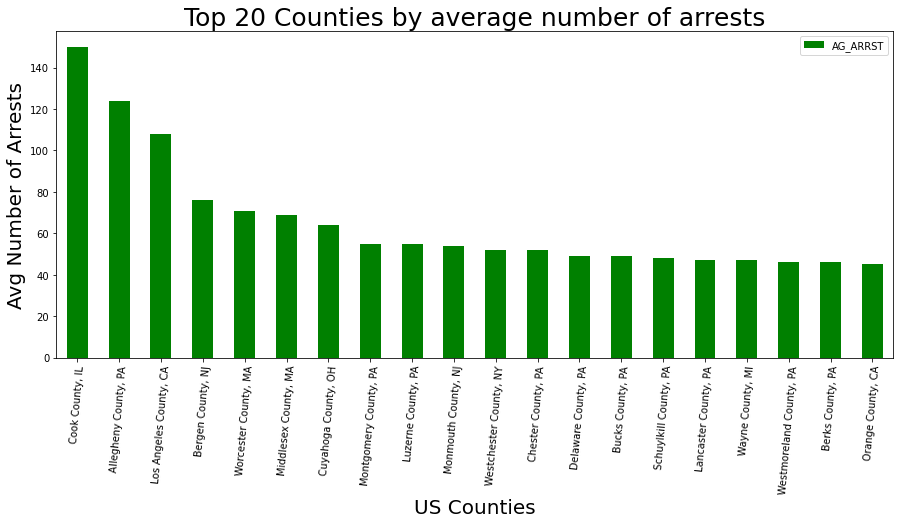

In [41]:
top_20 = df.sort_values(by=['AG_ARRST'], ascending=False)[["county_name","AG_ARRST"]].iloc[:20]
top_20.plot(kind='bar', figsize=(15,6), color='green', x = "county_name", y = "AG_ARRST")
plt.xticks(rotation=85)
plt.title("Top 20 Counties by average number of arrests", fontsize=25)
plt.xlabel("US Counties", fontsize=20)
plt.ylabel("Avg Number of Arrests", fontsize=20)
plt.show()

Here is a bar graph of the top 20 counties based on the number of the average arrest. The most arrest has been made at Cook county in Illinois state followed by  Allegheny County of Pennsylvania and Los Angeles County of California. 